#Part I:Data Wrangling

## QW1 Opening Data


In [0]:
from google.colab import files



import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
random.seed(123)

In [0]:
# function accepts id from urls



id_econ = "1b6GmmpMkVr7jxVLhgLz9SYLW-C_UxWxH"
id_I91 = "1WwCYF85HuwMwjlf1YB8m2Pg_Yiz64kQX"
id_I95 = "1hzhkq3UpxoIf3ZdVMn55Vdm00OYZKexb"
id_merrit="1IIASAuV30Kk5KWGi9j1J54KLIBBOwDa0"
id_adt = "1gdj4lStbgjxA_VKsWw8WWsN1AfPfyCkz"
id_pop = "1yterREDVWDvD40ugir61hYwXLOY2tGA4"
id_geog = "1UzHFplTkdydqAF2uTioAkupHKJS7PetA"
id_mp_townNumMap = "1wvWzeum70RgrfNao1BvdKfgdStUy79p7"



idList = [id_econ, id_I91,id_I95,id_merrit,id_adt,id_pop,id_geog,id_mp_townNumMap]
 

In [0]:
# pandas as pd


#Constructs google drive url by appending the id

def getGdriveURLFromId(id):
  return "https://drive.google.com/uc?export=download&id="+id
 
# function accepts id from urls 
def getUrls(idsList):
  urlList =[]
  for x in idsList:
    urlList.append(getGdriveURLFromId(x))
  return urlList


allUrlList = getUrls(idList)
df_econ = pd.read_csv(allUrlList[0],skiprows=5,header=0,encoding="cp1252",thousands=',')
df_econ = df_econ.dropna(axis=0,how="all")
df_econ = df_econ.dropna(axis=1,how="all")

# Remove duplicate rows
df_econ.duplicated().tolist().count(True)  
df_econ = df_econ.drop_duplicates(keep='first')

#Creating dataframe
df_I91 = pd.read_csv(allUrlList[1],encoding="cp1252")
df_I95 = pd.read_csv(allUrlList[2],encoding="cp1252")
df_Merrit= pd.read_csv(allUrlList[3],header=0,encoding="cp1252",dtype={3:'str'})
df_adt=pd.read_csv(allUrlList[4],header=0,encoding="cp1252")
df_pop = pd.read_csv(allUrlList[5],header=0,encoding="cp1252")
df_geog = pd.read_csv(allUrlList[6],header=0,encoding="cp1252")
df_townNumMap = pd.read_csv(allUrlList[7],header=0,encoding="cp1252")








###To check if there are duplicate rows


In [0]:
#print(getUrls(idList))


df_econ.duplicated().tolist().count(True)

df_I91.duplicated().tolist().count(True)

df_I95.duplicated().tolist().count(True)

df_Merrit.duplicated().tolist().count(True)

df_adt.duplicated().tolist().count(True)

df_pop.duplicated().tolist().count(True)

df_geog.duplicated().tolist().count(True)


0

###Check count of rows in the three datasets


In [0]:
df_geog





,County,Year Established,TOWN CAPITAL,Town
0,Fairfield,1855,BETHEL,Bethel
1,Fairfield,1821,BRIDGEPORT,Bridgeport
2,Fairfield,1788,BROOKFIELD,Brookfield
3,Fairfield,1687,DANBURY,Danbury
4,Fairfield,1820,DARIEN,Darien
5,Fairfield,1845,EASTON,Easton
6,Fairfield,1639,FAIRFIELD,Fairfield
7,Fairfield,1665,GREENWICH,Greenwich
8,Fairfield,1823,MONROE,Monroe
9,Fairfield,1801,NEW CANAAN,New Canaan


##Merging Data datasets

In [0]:
# Merge Economy, population and Geographic data

df_temp = df_econ.join(df_geog.set_index('Town') ,on='Towns',how='right')
df_temp_econ_pop_geo = df_temp.join(df_pop.set_index('Town'), on='Towns', how='left')
df_temp_econ_pop_geo = df_temp_econ_pop_geo.drop(['TOWN CAPITAL'],axis=1)
df_temp_econ_pop_geo.tail()



,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.
166,Wolcott,80323.0,Missing,-999.0,New Haven,1796,"16,673"
167,Woodbridge,133412.0,NaN,-999.0,New Haven,1784,"8,886"
168,Woodbury,80350.0,,-999.0,Litchfield,1673,"9,636"
169,Woodstock,78594.0,,-999.0,Windham,1690,"7,838"
169,Ansonia,NaN,NaN,NaN,New Haven,1889,"18,854"


#Handling Missing Data

##QW2: Filtering out missing data 

###count the missing rows per County

In [0]:
isMissing = df_temp_econ_pop_geo.loc[(df_temp_econ_pop_geo['Per capita income']==-999) | (df_temp_econ_pop_geo['Per capita income'].isnull())]
pv = pd.pivot_table(isMissing, values='Towns', index = ['County'], aggfunc='count')
pv




,Towns
County,
Fairfield,3
Hartford,4
Litchfield,5
Middlesex,1
New Haven,6
New London,1
Tolland,1
Windham,2


###part of clean dataframe

In [0]:
#Extracting the clean part of dataset by first appending missing data in order to intentionally generate duplicates(missing data), 
#and then removing duplicates with Keep= FALSE
df_econ_clean_part=df_temp_econ_pop_geo.append(isMissing)
df_econ_clean_part.drop_duplicates(keep=False,inplace=True)
df_econ_clean_part

,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.
1,Andover,100321.0,"111,230",40182.0,Tolland,1848,"3,262"
3,Ashford,77870.0,"95,339",39139.0,Windham,1714,"4,251"
4,Avon,123894.0,"172,245",66822.0,Hartford,1830,"18,414"
5,Barkhamsted,95735.0,"102,210",40156.0,Litchfield,1779,"3,685"
6,Beacon Falls,83155.0,"94,002",37736.0,New Haven,1871,"6,081"
7,Berlin,87810.0,"104,448",40865.0,Hartford,1785,"20,560"
8,Bethany,97254.0,"112,461",42397.0,New Haven,1832,"5,510"
9,Bethel,92125.0,"113,515",43569.0,Fairfield,1855,"19,529"
10,Bethlehem,84306.0,"114,218",43516.0,Litchfield,1787,"3,473"
11,Bloomfield,72762.0,"91,501",39155.0,Hartford,1835,"20,749"


###Calculate mean household income per county

In [0]:
# Function takes an object and changes it to numeric type
def changeObjToNumeric(df,x):
  return pd.to_numeric(df[x],errors='coerce')
  
df_econ_clean_part['Mean household income']= df_econ_clean_part.loc[:,'Mean household income'].str.replace(',','').astype(float)
df_econ_clean_part['Median household income'] = changeObjToNumeric(df_econ_clean_part,'Median household income')
df_econ_clean_part['Per capita income'] = changeObjToNumeric(df_econ_clean_part,'Per capita income')


# Function takes a dataframe along with values, index and aggfunc arguments to convert to a pivot table
def toPivotTable(df,x,i,a):
  return pd.pivot_table(df, values= x, index = i, aggfunc=a)

# Create pivot table for county and their respective mean incomes
pv_mean = toPivotTable(df_econ_clean_part,'Mean household income','County', 'mean') 
pv_median = toPivotTable(df_econ_clean_part,'Median household income','County', 'mean') 
pv_perCapita = toPivotTable(df_econ_clean_part,'Per capita income','County', 'mean') 

pv_perCapita


,Per capita income
County,
Fairfield,55557.000000
Hartford,40378.760000
Litchfield,43359.904762
Middlesex,43490.000000
New Haven,39014.952381
New London,36072.800000
Tolland,38603.583333
Windham,31948.538462


In [0]:
#takes a  data frame and returns a dictionary
def getDict(df_x):
    return df_x.to_dict()
  
dict_county_mean = getDict(pv_mean)
dict_county_median = getDict(pv_median)
dict_county_perCapita = getDict(pv_perCapita)

type(dict_county_median)
print(dict_county_median.get("Median household income").get("New Haven"))
pv_median

81778.33333333333


,Median household income
County,
Fairfield,109599.400000
Hartford,82458.760000
Litchfield,79753.000000
Middlesex,87139.857143
New Haven,81778.333333
New London,75787.450000
Tolland,87745.166667
Windham,71209.384615


##QW3: Replacing missing data 

In [0]:
isMissing['Mean household income']=round(isMissing['County'].map(dict_county_mean['Mean household income']),2)
isMissing['Per capita income']=round(isMissing['County'].map(dict_county_perCapita['Per capita income']),2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
isMissing = isMissing.reset_index().drop(axis=1,columns=['index'])
isMissing.tail()

,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.
18,Wolcott,80323.0,101200.67,39014.95,New Haven,1796,"16,673"
19,Woodbridge,133412.0,101200.67,39014.95,New Haven,1784,"8,886"
20,Woodbury,80350.0,105193.00,43359.90,Litchfield,1673,"9,636"
21,Woodstock,78594.0,82965.69,31948.54,Windham,1690,"7,838"
22,Ansonia,NaN,101200.67,39014.95,New Haven,1889,"18,854"


###Append data back

In [0]:
#Appending isMissing back to the dataset
df_econ_pop_geo = df_econ_clean_part.append(isMissing)
df_econ_pop_geo.sort_values(by='Towns',inplace=True)
df_econ_pop_geo.reset_index()
df_econ_pop_geo.head()



,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.
1,Andover,100321.0,111230.00,40182.00,Tolland,1848,"3,262"
22,Ansonia,NaN,101200.67,39014.95,New Haven,1889,"18,854"
3,Ashford,77870.0,95339.00,39139.00,Windham,1714,"4,251"
4,Avon,123894.0,172245.00,66822.00,Hartford,1830,"18,414"
5,Barkhamsted,95735.0,102210.00,40156.00,Litchfield,1779,"3,685"


#Data Transformation

##QW4: Removing duplicates
Done in early part

###Median household income for Ansonia

In [0]:
df_econ_pop_geo.index = range(1,len(df_econ_pop_geo)+1)
df_econ_pop_geo.loc[2,'Median household income'] = 81778.33
df_econ_pop_geo



,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.
1,Andover,100321.00,111230.00,40182.00,Tolland,1848,"3,262"
2,Ansonia,81778.33,101200.67,39014.95,New Haven,1889,"18,854"
3,Ashford,77870.00,95339.00,39139.00,Windham,1714,"4,251"
4,Avon,123894.00,172245.00,66822.00,Hartford,1830,"18,414"
5,Barkhamsted,95735.00,102210.00,40156.00,Litchfield,1779,"3,685"
6,Beacon Falls,83155.00,94002.00,37736.00,New Haven,1871,"6,081"
7,Berlin,87810.00,104448.00,40865.00,Hartford,1785,"20,560"
8,Bethany,97254.00,112461.00,42397.00,New Haven,1832,"5,510"
9,Bethel,92125.00,113515.00,43569.00,Fairfield,1855,"19,529"
10,Bethlehem,84306.00,114218.00,43516.00,Litchfield,1787,"3,473"


## QW5: Discretization and Binning 

In [0]:
meanPerCapita = df_econ_pop_geo['Per capita income'].mean()

df_econ_pop_geo['PerCapitaFlag']= np.where(df_econ_pop_geo['Per capita income']> meanPerCapita , '1','0')


#Data Wrangling

##Feature Engineering

**EXTRA CREDIT: Figure out why Greenwich is off (what town is missing?)** 

The missing town appears to be Eastford because if you look at all the towns up to #44 (whch is East lyme), the numbers match.  It would appear that the ADT data skips over eastford and assumes East windsor as #46.  Subsequently, it skips over Easton as well

**EXTRA CREDIT: I want you to create a new column that has the order of towns. We will cover this in class.**

The below data frame contains a column named Town_num that has the order of towns.
This mapping of Town numbers to Town names is as per the highway data and will be merged with the ADT table





In [0]:
df_townNumMap

,Town_num,Town
0,56,Greenwich
1,135,Stamford
2,35,Darien
3,102,Norwalk
4,158,Westport
5,50,Fairfield
6,15,Bridgeport
7,138,Stratford
8,83,Milford
9,106,Orange


###Clean I91 data

In [0]:
#Drop columns- State and County
df_I91 = df_I91.drop(['State','County'],axis=1)


#Rename columns
df_I91.rename(index=str, columns={"Location[3][41]": "Town", "mi[3][4][42]": "Miles", "Exit[43]":"Exit"},inplace=True)


In [0]:
# Forward fill the Town names and Fill "Nan" in empty cells of 'Exit' column
df_I91['Town'] = df_I91['Town'].fillna(method = 'ffill',axis = 0)
df_I91_clean = df_I91[df_I91['Exit'].str.contains('\d',na=False)]

df_I91_clean.drop(df_I91_clean[~df_I91_clean.Town.isin(df_econ.Towns)].index, inplace=True)

#Add a column named 'Route'
df_I91_clean['Route'] = '091'
df_I91_clean


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Town,Miles,km,Exit,Destinations,Notes,Route
1,New Haven,0.09,0.14,1,MLK Boulevard (Route 34) Downtown New Haven,Southbound exit and northbound entrance; easte...,091
3,New Haven,0.63,1.01,2,Hamilton Street,Northbound exit only from I-95S entrance ramp,091
5,New Haven,0.99,1.59,3,Trumbull Street,Additional northbound entrance merge from Stat...,091
7,New Haven,1.30,2.09,4,State Street,Southbound exit only (via Humphrey Street),091
8,New Haven,1.33,2.14,5,US 5 (State Street) Fair Haven,Northbound exit and southbound entrance only,091
9,New Haven,1.44,2.32,6,US 5 / Willow Street / Blatchley Avenue,Left exit northbound; US 5 only appears on sou...,091
11,New Haven,1.78,2.86,7,Ferry Street Fair Haven,Southbound exit and northbound entrance only,091
13,New Haven,2.78,4.47,8,Route 17 (Middletown Avenue) / Route 80 Nort...,NaN,091
14,North Haven,4.81,7.74,9,Montowese Avenue (SR 17),NaN,091
15,North Haven,6.63,10.67,10,"Route 40 Hamden, Cheshire, Mount Carmel",Also serves Quinnipiac University,091


###clean I95 data

In [0]:
#Drop column- County
df_I95 = df_I95.drop(['County'],axis=1)

#Rename columns
df_I95.rename(index=str, columns={"Location":"Town", "mi": "Miles"},inplace=True)

In [0]:

# Forward fill the Town names and Fill "Nan" in empty cells of 'Exit' column
df_I95['Town'] = df_I95['Town'].fillna(method = 'ffill',axis = 0)
df_I95_clean = df_I95[df_I95['Exit'].str.contains('\d',na=False)]

df_I95_clean.drop(df_I95_clean[~df_I95_clean.Town.isin(df_econ.Towns)].index, inplace=True)

# Add a column named 'Route'
df_I95_clean['Route'] = '095'
df_I95_clean



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Town,Miles,km,Exit,Destinations,Notes,Route
1,Greenwich,0.80,1.29,2,Delavan Avenue Byram,NaN,095
3,Greenwich,2.54,4.09,3,Arch Street Greenwich,NaN,095
4,Greenwich,3.73,6.00,4,"Indian Field Road Cos Cob, Greenwich",NaN,095
7,Greenwich,5.53,8.90,5,"US 1 Riverside, Old Greenwich, Mianus",NaN,095
8,Stamford,6.50,10.46,6,Harvard Avenue,Northbound exit and southbound entrance,095
11,Stamford,7.34,11.81,7,To Route 137 north / Greenwich Avenue,Access via Washington Boulevard (SSR 493); sou...,095
12,Stamford,7.68,12.36,8,Canal Street,Northbound exit and southbound entrance,095
15,Stamford,9.28,14.93,9,US 1 / Route 106 Glenbrook,NaN,095
16,Darien,10.75,17.30,10,Noroton,Access to Noroton Avenue via Hecker Avenue nor...,095
17,Darien,11.61,18.68,11,"US 1 Darien, Rowayton",Southbound entrance via Ledge Road,095


###Clean Route 15 Merrit data

In [0]:
#Rename columns
df_Merrit.rename(index=str, columns={"Location": "Town", "mi": "Miles"},inplace=True)

In [0]:
# Forward fill the Town names and Fill "Nan" in empty cells of 'Exit' column
df_Merrit['Town'] = df_Merrit['Town'].fillna(method = 'ffill',axis = 0)



# Add a column named 'Route'
df_Merrit_clean = df_Merrit[df_Merrit['Exit'].str.contains('\d',na=False)]

df_Merrit_clean.drop(df_Merrit_clean[~df_Merrit_clean.Town.isin(df_econ.Towns)].index, inplace=True)

df_Merrit_clean['Route'] = '015'
df_Merrit_clean



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Town,Miles,km,Exit,Destinations,Notes,Route
1,Greenwich,NaN,NaN,27,"NY 120A (King Street) Armonk, NY",Northbound exit signed as exit 30 on Hutchinso...,015
2,Greenwich,3.48,5.60,28,Round Hill Road Greenwich,To Greenwich business district,015
3,Greenwich,4.69,7.55,29,Lake Avenue Greenwich,NaN,015
4,Greenwich,5.65,9.09,31,North Street Greenwich,To Greenwich business district,015
5,Stamford,8.90,14.32,33,Den Road Stamford,NaN,015
6,Stamford,9.48,15.26,34,"Route 104 (Long Ridge Road) Stamford, Long R...",To Downtown Stamford and University of Connect...,015
7,Stamford,10.67,17.17,35,"Route 137 (High Ridge Road) Stamford, High R...",NaN,015
8,New Canaan,13.24,21.31,36,"Route 106 (Old Stamford Road) New Canaan, Sp...",NaN,015
9,New Canaan,14.14,22.76,37,"Route 124 New Canaan, Darien",NaN,015
10,Norwalk,15.88,25.56,38,"Route 123 (New Canaan Avenue) New Canaan, No...",To Norwalk Community College,015


###Append all highway data into 1 dataframe

In [0]:
## Append all highway data into 1 dataframe
df_temp1 = df_I91_clean.append(df_I95_clean)
df_highway = df_temp1.append(df_Merrit_clean)
df_highway.reset_index()
df_highway

,Town,Miles,km,Exit,Destinations,Notes,Route
1,New Haven,0.09,0.14,1,MLK Boulevard (Route 34) Downtown New Haven,Southbound exit and northbound entrance; easte...,091
3,New Haven,0.63,1.01,2,Hamilton Street,Northbound exit only from I-95S entrance ramp,091
5,New Haven,0.99,1.59,3,Trumbull Street,Additional northbound entrance merge from Stat...,091
7,New Haven,1.30,2.09,4,State Street,Southbound exit only (via Humphrey Street),091
8,New Haven,1.33,2.14,5,US 5 (State Street) Fair Haven,Northbound exit and southbound entrance only,091
9,New Haven,1.44,2.32,6,US 5 / Willow Street / Blatchley Avenue,Left exit northbound; US 5 only appears on sou...,091
11,New Haven,1.78,2.86,7,Ferry Street Fair Haven,Southbound exit and northbound entrance only,091
13,New Haven,2.78,4.47,8,Route 17 (Middletown Avenue) / Route 80 Nort...,NaN,091
14,North Haven,4.81,7.74,9,Montowese Avenue (SR 17),NaN,091
15,North Haven,6.63,10.67,10,"Route 40 Hamden, Cheshire, Mount Carmel",Also serves Quinnipiac University,091


##Features for modeling

### RoadLen

In [0]:
# Calulate RoadLen for a town

# Extract only the 3 routes(15,91 and 95) from ADT table
df_adt_3_routes = df_adt.loc[(df_adt['Route'] == '015')|(df_adt['Route'] == '095')|(df_adt['Route'] == '091')]

# Create apivot table 
pt_length_per_town = pd.pivot_table(df_adt_3_routes, index = ['Town','Route'], values = ['Begin Mile Pt','End Mile Pt'], aggfunc='sum')

# Use formula to calculate length of road
pt_length_per_town['length'] =  pt_length_per_town['End Mile Pt'] - pt_length_per_town['Begin Mile Pt']


In [0]:
#Merge pivot table results with ADT table 
df_adt_length = df_adt.merge(pt_length_per_town['length'], left_on=['Town','Route'],right_on=['Town','Route'])

## Add 3 new columns for RoadLenXX based on route condition 
df_adt_length['RoadLen15'] = df_adt_length[df_adt_length['Route']=='015']['length']
df_adt_length['RoadLen91'] = df_adt_length[df_adt_length['Route']=='091']['length']
df_adt_length['RoadLen95'] = df_adt_length[df_adt_length['Route']=='095']['length']

##Rename Town column in the adt table
df_adt_length = df_adt_length.rename(columns = {"Town":"Town_num"})
#df_adt_length = df_adt_length.drop(columns = ['Begin Mile Pt', 'End Mile Pt','Year','Functional Class'])
df_adt_length




,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN


In [0]:
# Create pivot table to view number of exit per town grouped by Routes
pv_Num_town_exit = pd.pivot_table(df_highway,index=['Route','Town'],values = ['Exit'],aggfunc='count')

# Merge the mapping of Town number with Townname to the ADT table
# Note to have the content of ADT table more intuitive, a new name is given to ADT table after each merge
df_adt_length_exit_town = df_adt_length.merge(df_townNumMap,left_on=['Town_num'],right_on=['Town_num'],how='left')

# Merge the results of pivot table with ADT table.
df_adt_length_exit_town = df_adt_length_exit_town.merge(pv_Num_town_exit,left_on=['Route','Town'],right_on=['Route','Town'], how= 'left')

df_adt_length_exit_town

,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN,Stamford,3.0


Pret : all roadlen

In [0]:
#df_road_len_15 = df_adt_length_exit_town.loc[df_adt_length_exit_town['Route']=='015']
#df_road_len_15 = df_road_len_15[['Town','RoadLen15']].drop_duplicates()
#df_road_len_15
def filter_column_for_route(ipDataFrame, route, columnName):
  ipDataFrame = ipDataFrame.loc[ipDataFrame['Route']==route][['Town',columnName]].drop_duplicates()
  #[['Town',columnName]].drop_duplicates()
  return ipDataFrame;



In [0]:
temp_RoadLen15 = filter_column_for_route(df_adt_length_exit_town,'015','RoadLen15')
temp_RoadLen91 = filter_column_for_route(df_adt_length_exit_town,'091','RoadLen91')
temp_RoadLen95 = filter_column_for_route(df_adt_length_exit_town,'095','RoadLen95')

df_all_road_len = temp_RoadLen15.merge(temp_RoadLen91, on='Town',how='outer').merge(temp_RoadLen95,on='Town',how='outer').fillna(0)
df_all_road_len = df_all_road_len.sort_values('Town')

df_all_road_len

,Town,RoadLen15,RoadLen91,RoadLen95
16,Berlin,6.45,0.00,0.00
32,Branford,0.00,0.00,6.28
29,Bridgeport,0.00,0.00,3.78
35,Clinton,0.00,0.00,3.75
22,Cromwell,0.00,2.21,0.00
28,Darien,0.00,0.00,3.69
20,East Hartford,1.63,0.00,0.00
31,East Haven,0.00,0.00,1.50
39,East Lyme,0.00,0.00,5.03
26,East Windsor,0.00,1.72,0.00


### NumExits

In [0]:

# Defined a new dataframe for ADT with the combined columns
df_adt_num_exit = df_adt_length_exit_town

#  Add 3 new columns for NumExitsXX based on route condition
df_adt_num_exit['NumExits15'] = df_adt_num_exit[df_adt_length['Route']=='015']['Exit']
df_adt_num_exit['NumExits91'] = df_adt_num_exit[df_adt_num_exit['Route']=='091']['Exit']
df_adt_num_exit['NumExits95'] = df_adt_num_exit[df_adt_num_exit['Route']=='095']['Exit']
df_adt_num_exit



,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN,Stamford,3.0,3.0,NaN,NaN


In [0]:
temp_NumExits15 = filter_column_for_route(df_adt_num_exit,'015','NumExits15')
temp_NumExits91 = filter_column_for_route(df_adt_num_exit,'091','NumExits91')
temp_NumExits95 = filter_column_for_route(df_adt_num_exit,'095','NumExits95')

df_all_road_num_exits = temp_NumExits15.merge(temp_NumExits91, on='Town',how='outer').merge(temp_NumExits95,on='Town',how='outer').fillna(0)
df_all_road_num_exits = df_all_road_num_exits.sort_values('Town')

df_all_road_num_exits

,Town,NumExits15,NumExits91,NumExits95
16,Berlin,0.0,0.0,0.0
32,Branford,0.0,0.0,4.0
29,Bridgeport,0.0,0.0,8.0
35,Clinton,0.0,0.0,1.0
22,Cromwell,0.0,2.0,0.0
28,Darien,0.0,0.0,4.0
20,East Hartford,0.0,0.0,0.0
31,East Haven,0.0,0.0,2.0
39,East Lyme,0.0,0.0,5.0
26,East Windsor,0.0,2.0,0.0


### RoadLenPerExits

In [0]:
# Defined a new dataframe for ADT with the combined columns
df_adt_len_per_exit = df_adt_num_exit

#  Add 3 new columns for RoadLenPerExits based on route condition
df_adt_len_per_exit['RoadLenPerExits15'] = df_adt_len_per_exit['RoadLen15']/df_adt_len_per_exit['NumExits15']
df_adt_len_per_exit['RoadLenPerExits91'] = df_adt_len_per_exit['RoadLen91']/df_adt_len_per_exit['NumExits91']
df_adt_len_per_exit['RoadLenPerExits95'] = df_adt_len_per_exit['RoadLen95']/df_adt_len_per_exit['NumExits95']
df_adt_len_per_exit.loc[df_adt_len_per_exit['Town_num']== 83]
#df_adt_len_per_exit


,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95
63,83,015,37.53,37.67,2.0,80400,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
64,83,015,37.67,37.96,2.0,65900,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
65,83,015,37.96,38.14,2.0,58500,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
66,83,015,38.14,38.49,2.0,52200,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
67,83,015,38.49,38.51,2.0,56600,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
68,83,015,38.51,38.66,2.0,57900,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
69,83,015,38.66,39.55,2.0,59200,2012,2.02,2.02,NaN,NaN,Milford,1.0,1.0,NaN,NaN,2.02,NaN,NaN
340,83,095,34.54,35.29,1.0,112400,2011,6.79,NaN,NaN,6.79,Milford,7.0,NaN,NaN,7.0,NaN,NaN,0.97
341,83,095,35.29,35.53,1.0,108900,2011,6.79,NaN,NaN,6.79,Milford,7.0,NaN,NaN,7.0,NaN,NaN,0.97
342,83,095,35.53,35.71,1.0,117900,2011,6.79,NaN,NaN,6.79,Milford,7.0,NaN,NaN,7.0,NaN,NaN,0.97


In [0]:
temp_RoadLenPerExits15 = filter_column_for_route(df_adt_len_per_exit,'015','RoadLenPerExits15')
temp_RoadLenPerExits91 = filter_column_for_route(df_adt_len_per_exit,'091','RoadLenPerExits91')
temp_RoadLenPerExits95 = filter_column_for_route(df_adt_len_per_exit,'095','RoadLenPerExits95')

df_all_road_len_per_exit = temp_RoadLenPerExits15.merge(temp_RoadLenPerExits91, on='Town',how='outer').merge(temp_RoadLenPerExits95,on='Town',how='outer').fillna(0)
df_all_road_len_per_exit = df_all_road_len_per_exit.sort_values('Town')

df_all_road_len_per_exit

,Town,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95
16,Berlin,0.000000,0.000000,0.000000
32,Branford,0.000000,0.000000,1.570000
29,Bridgeport,0.000000,0.000000,0.472500
35,Clinton,0.000000,0.000000,3.750000
22,Cromwell,0.000000,1.105000,0.000000
28,Darien,0.000000,0.000000,0.922500
20,East Hartford,0.000000,0.000000,0.000000
31,East Haven,0.000000,0.000000,0.750000
39,East Lyme,0.000000,0.000000,1.006000
26,East Windsor,0.000000,0.860000,0.000000


###MinTraff

In [0]:
# Created a pivot table to calculate MinTraffXX
pv_Min_Adt = pd.pivot_table(df_adt_len_per_exit,index=['Route','Town'],values = ['ADT'],aggfunc='min')

# Rename column in pivot table
pv_Min_Adt = pv_Min_Adt.rename(columns={'ADT':'min_ADT'})

# Merge the pivot table with ADT table
df_Min_adt_length_exit_town = df_adt_length_exit_town.merge(pv_Min_Adt,left_on=['Route','Town'],right_on=['Route','Town'])

# Add 3 new columns for MinTraffXX based on route condition
df_Min_adt_length_exit_town['MinTraff15'] = df_Min_adt_length_exit_town[df_Min_adt_length_exit_town['Route']=='015']['min_ADT']
df_Min_adt_length_exit_town['MinTraff91'] = df_Min_adt_length_exit_town[df_Min_adt_length_exit_town['Route']=='091']['min_ADT']
df_Min_adt_length_exit_town['MinTraff95'] = df_Min_adt_length_exit_town[df_Min_adt_length_exit_town['Route']=='095']['min_ADT']
df_Min_adt_length_exit_town


,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95,min_ADT,MinTraff15,MinTraff91,MinTraff95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN,Stamford,3.0,3.0,NaN,NaN,1.443333,NaN,NaN,53400,53400.0,NaN,NaN


In [0]:
temp_route_MinTraff15 = filter_column_for_route(df_Min_adt_length_exit_town,'015','MinTraff15')
temp_route_MinTraff91 = filter_column_for_route(df_Min_adt_length_exit_town,'091','MinTraff91')
temp_route_MinTraff95 = filter_column_for_route(df_Min_adt_length_exit_town,'095','MinTraff95')

df_all_road_route_min_traff = temp_route_MinTraff15.merge(temp_route_MinTraff91, on='Town',how='outer').merge(temp_route_MinTraff95,on='Town',how='outer').fillna(0)
df_all_road_route_min_traff = df_all_road_route_min_traff.sort_values('Town')

df_all_road_route_min_traff

,Town,MinTraff15,MinTraff91,MinTraff95
16,Berlin,23700.0,0.0,0.0
32,Branford,0.0,0.0,71000.0
29,Bridgeport,0.0,0.0,119200.0
35,Clinton,0.0,0.0,58000.0
22,Cromwell,0.0,106600.0,0.0
28,Darien,0.0,0.0,133000.0
20,East Hartford,58800.0,0.0,0.0
31,East Haven,0.0,0.0,77500.0
39,East Lyme,0.0,0.0,55800.0
26,East Windsor,0.0,94000.0,0.0


###MeanTraff



In [0]:
# Created a pivot table to calculate MeanTraffXX
pv_Mean_Adt = pd.pivot_table(df_adt_len_per_exit,index=['Route','Town'],values = ['ADT'],aggfunc='mean')

# Rename column in pivot table
pv_Mean_Adt = pv_Mean_Adt.rename(columns={'ADT':'mean_ADT'})

# Merge the pivot table with ADT table
df_Mean_Min_adt_length_exit_town = df_Min_adt_length_exit_town.merge(pv_Mean_Adt,left_on=['Route','Town'],right_on=['Route','Town'])

# Add 3 new columns for MeanTraffXX based on route condition
df_Mean_Min_adt_length_exit_town['MeanTraff15']= df_Mean_Min_adt_length_exit_town[df_Mean_Min_adt_length_exit_town['Route']=='015']['mean_ADT']
df_Mean_Min_adt_length_exit_town['MeanTraff91']= df_Mean_Min_adt_length_exit_town[df_Mean_Min_adt_length_exit_town['Route']=='091']['mean_ADT']
df_Mean_Min_adt_length_exit_town['MeanTraff95']= df_Mean_Min_adt_length_exit_town[df_Mean_Min_adt_length_exit_town['Route']=='095']['mean_ADT']
df_Mean_Min_adt_length_exit_town.head()

,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95,min_ADT,MinTraff15,MinTraff91,MinTraff95,mean_ADT,MeanTraff15,MeanTraff91,MeanTraff95
0,56,015,0.00,0.05,2.0,47400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN


In [0]:
temp_route_MeanTraff15 = filter_column_for_route(df_Mean_Min_adt_length_exit_town,'015','MeanTraff15')
temp_route_MeanTraff91 = filter_column_for_route(df_Mean_Min_adt_length_exit_town,'091','MeanTraff91')
temp_route_MeanTraff95 = filter_column_for_route(df_Mean_Min_adt_length_exit_town,'095','MeanTraff95')

df_all_road_route_Mean_traff = temp_route_MeanTraff15.merge(temp_route_MeanTraff91, on='Town',how='outer').merge(temp_route_MeanTraff95,on='Town',how='outer').fillna(0)
df_all_road_route_Mean_traff = df_all_road_route_Mean_traff.sort_values('Town')

df_all_road_route_Mean_traff



,Town,MeanTraff15,MeanTraff91,MeanTraff95
16,Berlin,27609.090909,0.000000,0.000000
32,Branford,0.000000,0.000000,81270.000000
29,Bridgeport,0.000000,0.000000,143000.000000
35,Clinton,0.000000,0.000000,61325.000000
22,Cromwell,0.000000,119900.000000,0.000000
28,Darien,0.000000,0.000000,144610.000000
20,East Hartford,66000.000000,0.000000,0.000000
31,East Haven,0.000000,0.000000,86340.000000
39,East Lyme,0.000000,0.000000,69233.333333
26,East Windsor,0.000000,100680.000000,0.000000


###MaxTraff

In [0]:
# Created a pivot table to calculate MaxTraffXX
pv_Mean_Adt = pd.pivot_table(df_adt_len_per_exit,index=['Route','Town'],values = ['ADT'],aggfunc='max')

# Rename column in pivot table
pv_Mean_Adt = pv_Mean_Adt.rename(columns={'ADT':'max_ADT'})

# Merge the pivot table with ADT table
df_Max_Mean_Min_adt_length_exit_town = df_Mean_Min_adt_length_exit_town.merge(pv_Mean_Adt,left_on=['Route','Town'],right_on=['Route','Town'])

# Add 3 new columns for MaxTraffXX based on route condition
df_Max_Mean_Min_adt_length_exit_town['MaxTraff15']= df_Max_Mean_Min_adt_length_exit_town[df_Max_Mean_Min_adt_length_exit_town['Route']=='015']['max_ADT']
df_Max_Mean_Min_adt_length_exit_town['MaxTraff91']= df_Max_Mean_Min_adt_length_exit_town[df_Max_Mean_Min_adt_length_exit_town['Route']=='091']['max_ADT']
df_Max_Mean_Min_adt_length_exit_town['MaxTraff95']= df_Max_Mean_Min_adt_length_exit_town[df_Max_Mean_Min_adt_length_exit_town['Route']=='095']['max_ADT']
df_Max_Mean_Min_adt_length_exit_town

,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95,min_ADT,MinTraff15,MinTraff91,MinTraff95,mean_ADT,MeanTraff15,MeanTraff91,MeanTraff95,max_ADT,MaxTraff15,MaxTraff91,MaxTraff95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925000,NaN,NaN,44000,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400,56400.0,NaN,NaN
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN,Stamford,3.0,3.0,NaN,NaN,1.443333,NaN,NaN,53400,53400.0,NaN,NaN,57500.000000,57500.000000,NaN,NaN,65900,65900.0,NaN,NaN


In [0]:
temp_route_MaxTraff15 = filter_column_for_route(df_Max_Mean_Min_adt_length_exit_town,'015','MaxTraff15')
temp_route_MaxTraff91 = filter_column_for_route(df_Max_Mean_Min_adt_length_exit_town,'091','MaxTraff91')
temp_route_MaxTraff95 = filter_column_for_route(df_Max_Mean_Min_adt_length_exit_town,'095','MaxTraff95')

df_all_road_route_Max_traff = temp_route_MaxTraff15.merge(temp_route_MaxTraff91, on='Town',how='outer').merge(temp_route_MaxTraff95,on='Town',how='outer').fillna(0)
df_all_road_route_Max_traff = df_all_road_route_Max_traff.sort_values('Town')

df_all_road_route_Max_traff



,Town,MaxTraff15,MaxTraff91,MaxTraff95
16,Berlin,31200.0,0.0,0.0
32,Branford,0.0,0.0,98100.0
29,Bridgeport,0.0,0.0,161300.0
35,Clinton,0.0,0.0,64700.0
22,Cromwell,0.0,147200.0,0.0
28,Darien,0.0,0.0,153000.0
20,East Hartford,76000.0,0.0,0.0
31,East Haven,0.0,0.0,98100.0
39,East Lyme,0.0,0.0,81200.0
26,East Windsor,0.0,107200.0,0.0


##Combining and Merging Datasets

In [0]:
## Drop redundant columns (functional class, Exits,min_ADT, max_ADT,) from the above feauture engineereed highway data
  
df_fe_adt = df_Max_Mean_Min_adt_length_exit_town.drop(['Functional Class','Exit','min_ADT','max_ADT'], axis=1)
df_fe_adt.head()

,Town_num,Route,Begin Mile Pt,End Mile Pt,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95,MinTraff15,MinTraff91,MinTraff95,mean_ADT,MeanTraff15,MeanTraff91,MeanTraff95,MaxTraff15,MaxTraff91,MaxTraff95
0,56,015,0.00,0.05,47400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,NaN,NaN,1.925,NaN,NaN,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400.0,NaN,NaN
1,56,015,0.05,0.15,44000,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,NaN,NaN,1.925,NaN,NaN,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400.0,NaN,NaN
2,56,015,0.15,3.39,48400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,NaN,NaN,1.925,NaN,NaN,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400.0,NaN,NaN
3,56,015,3.39,3.44,47400,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,NaN,NaN,1.925,NaN,NaN,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400.0,NaN,NaN
4,56,015,3.44,4.16,49900,2012,7.7,7.7,NaN,NaN,Greenwich,4.0,NaN,NaN,1.925,NaN,NaN,44000.0,NaN,NaN,49655.555556,49655.555556,NaN,NaN,56400.0,NaN,NaN


In [0]:
df_econ_pop_geo.head()

,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.,PerCapitaFlag
1,Andover,100321.00,111230.00,40182.00,Tolland,1848,"3,262",0
2,Ansonia,81778.33,101200.67,39014.95,New Haven,1889,"18,854",0
3,Ashford,77870.00,95339.00,39139.00,Windham,1714,"4,251",0
4,Avon,123894.00,172245.00,66822.00,Hartford,1830,"18,414",1
5,Barkhamsted,95735.00,102210.00,40156.00,Litchfield,1779,"3,685",0


In [0]:
#  All the datasets merged and stored in df_connecticut
df_connecticut = df_econ_pop_geo.merge(df_fe_adt,left_on = 'Towns', right_on = 'Town', how= 'left')
df_connecticut.tail()

,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.,PerCapitaFlag,Town_num,Route,Begin Mile Pt,End Mile Pt,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95,MinTraff15,MinTraff91,MinTraff95,mean_ADT,MeanTraff15,MeanTraff91,MeanTraff95,MaxTraff15,MaxTraff91,MaxTraff95
595,Woodbridge,133412.0,101200.67,39014.95,New Haven,1784,"8,886",0,167.0,015,45.50,45.81,64300.0,2012.0,2.41,2.41,NaN,NaN,Woodbridge,NaN,NaN,NaN,NaN,NaN,NaN,62500.0,NaN,NaN,65250.0,65250.0,NaN,NaN,69900.0,NaN,NaN
596,Woodbridge,133412.0,101200.67,39014.95,New Haven,1784,"8,886",0,167.0,015,46.77,46.88,62500.0,2012.0,2.41,2.41,NaN,NaN,Woodbridge,NaN,NaN,NaN,NaN,NaN,NaN,62500.0,NaN,NaN,65250.0,65250.0,NaN,NaN,69900.0,NaN,NaN
597,Woodbridge,133412.0,101200.67,39014.95,New Haven,1784,"8,886",0,167.0,015,46.88,47.20,69900.0,2012.0,2.41,2.41,NaN,NaN,Woodbridge,NaN,NaN,NaN,NaN,NaN,NaN,62500.0,NaN,NaN,65250.0,65250.0,NaN,NaN,69900.0,NaN,NaN
598,Woodbury,80350.0,105193.00,43359.90,Litchfield,1673,"9,636",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,Woodstock,78594.0,82965.69,31948.54,Windham,1690,"7,838",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Part II: Analysis

## Question A1: What are the top 10 towns with the longest highways? Make a table and describe what you see.

In [0]:
#df_adt_length.loc[df_adt_length['Town_num']== 92]
df_adt_length

,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN


##Top 10 towns with the longest highway

In [0]:
df_adt_length= df_adt_length.merge(df_townNumMap, left_on='Town_num',right_on='Town_num',how='left')
df_adt_length



,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.70,NaN,NaN,Greenwich
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.70,NaN,NaN,Greenwich
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.70,NaN,NaN,Greenwich
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.70,NaN,NaN,Greenwich
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.70,NaN,NaN,Greenwich
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.70,NaN,NaN,Greenwich
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.70,NaN,NaN,Greenwich
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.70,NaN,NaN,Greenwich
9,135,015,7.70,8.89,2.0,56400,2012,4.33,4.33,NaN,NaN,Stamford


In [0]:
df_adt_length_per_route = pd.pivot_table(df_adt_length, index= ['Town_num','Route','Town'], values = 'length')
df_adt_length_per_route.reset_index()


df_adt_highway_length_per_town = df_adt_length_per_route.groupby(['Town_num','Town']).sum()

df_adt_highway_length_per_town.sort_values(by='length',ascending=False).head(10)

,,length
Town_num,Town,
56,Greenwich,13.99
148,Wallingford,12.30
100,North Haven,11.47
50,Fairfield,10.65
102,Norwalk,8.96
92,New Haven,8.91
83,Milford,8.81
79,Meriden,8.44
158,Westport,8.19


##Greenwhich is the town with the longest highway and stamford being the tenth. this length table is only for highways95,91 and 15

#	Question A2: How many towns in each county have at least two highways?  Make a table and describe what you see.

> Indented block



In [0]:
#to get number names of county corresponding to the town
df_number_highway_county = df_adt_length.merge(df_econ_pop_geo, left_on='Town',right_on='Towns',how='left')

df_number_highway_county_info= pd.pivot_table(df_number_highway_county, index= ['County','Town','Town_num','Route'], values = 'length')
df_number_highway_county_info.reset_index()
df_number_highway_county_info

df_number_highway_county_info_sum= df_number_highway_county_info.groupby(['County','Town_num','Town']).count()

df_county_town_highway_two_more=  df_number_highway_county_info_sum.loc[df_number_highway_county_info_sum['length'] >1]

df_county_town_highway_two_more.rename(columns={'length':'Number_of_highways'},inplace= 'True')

df_county_town_highway_two_more

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Number_of_highways
County    Town_num Town                            
Fairfield 50       Fairfield                      2
          56       Greenwich                      2
          102      Norwalk                        2
          135      Stamford                       2
          138      Stratford                      2
          158      Westport                       2
Hartford  63       Hartford                       2
          159      Wethersfield                   2
New Haven 79       Meriden                        2
          83       Milford                        2
          92       New Haven                      3
          100      North Haven                    2
          106      Orange                         2
          148      Wallingford                    2

##The following three counties have towns with two or more highways connecting them.
##New Haven- 6 Towns
##Fairfield - 6 Towns
##Hartford - 2 Towns

## Question A3: Is there any relationship between highway length and income? Show the distributions of each variable (hist or density plot) and a scatterplot with a smoothed trendline.

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#df_adt_highway_length_per_town

df_highway_length_populaton = df_adt_highway_length_per_town.merge(df_econ_pop_geo, left_on='Town',right_on='Towns',how='left')
df_highway_length_populaton





,length,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.,PerCapitaFlag
0,6.45,Berlin,87810.0,104448.00,40865.00,Hartford,1785,"20,560",0
1,6.28,Branford,71938.0,97243.00,44043.00,New Haven,1685,"28,145",1
2,3.78,Bridgeport,41801.0,56565.00,21002.00,Fairfield,1821,"147,629",0
3,3.75,Clinton,71455.0,90436.00,36954.00,Middlesex,1838,"13,047",0
4,2.21,Cromwell,82081.0,101902.00,40905.00,Middlesex,1851,"14,034",0
5,3.69,Darien,208906.0,313277.00,96767.00,Fairfield,1820,"21,787",1
6,1.63,East Hartford,48369.0,60216.00,24961.00,Hartford,1783,"50,821",0
7,1.50,East Haven,63120.0,78485.00,31781.00,New Haven,1785,"28,935",0
8,5.03,East Lyme,84029.0,104053.00,41161.00,New London,1839,"19,343",0
9,1.72,East Windsor,74798.0,84660.00,34623.00,Hartford,1768,"11,400",0


Text(0.5, 1.0, 'Median household income')

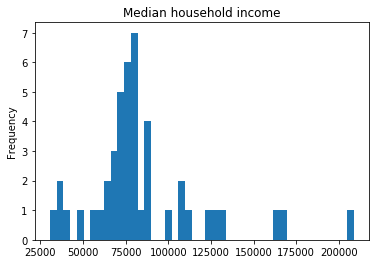

In [0]:
##Med hist

title2 = 'Median household income'

med_his = df_highway_length_populaton['Median household income'].plot.hist(bins=45)

med_his.set_title(title2)

Text(0.5, 1.0, 'length of highway')

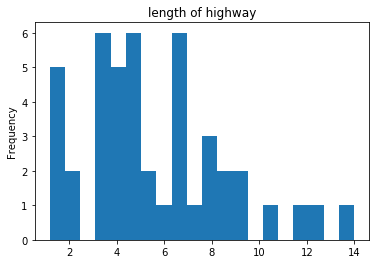

In [0]:
##length hist

title2 = 'length of highway'

med_his = df_highway_length_populaton['length'].plot.hist(bins=20)

med_his.set_title(title2)

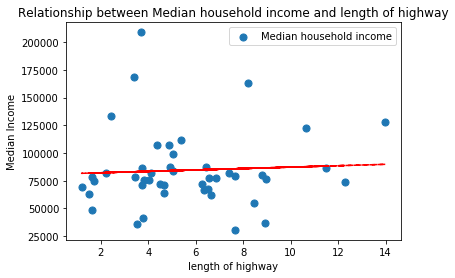

In [0]:
##  scatter

data = df_highway_length_populaton[['length', 'Median household income']]
x = data['length']
y = data['Median household income']
title1 = 'Relationship between Median household income and length of highway'
plt.scatter(x, y, label='Median household income', s=50)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title(title1)

plt.legend()
plt.xlabel("length of highway")
plt.ylabel("Median Income")


plt.show()

There is a positive correlation between length of highway and income

##Question A4: Any relationship between number of exits and income? Show the distributions of each variable (hist or density plot) and a scatterplot with a smoothed trendline.

In [0]:
#pv_town_exit = pd.pivot_table(df_townNumMap,index=['Town_name'],values = ['Exit'],aggfunc='count')
#pv_town_exit['Exit_count'] = pv_town_exit
#type(pv_town_exit)
#pv_town_exit

In [0]:
#df_adt_len_per_exit

pt_townCount_highway_exit = pd.pivot_table(df_adt_len_per_exit, index= ['Town_num','Route','Town'], values = 'Exit')
pt_townCount_highway_exit_sum = pt_townCount_highway_exit.groupby(['Town','Town_num']).sum()
pt_townCount_highway_exit_sum
pt_townCount_highway_exit_sum.reset_index()

,Town,Town_num,Exit
0,Branford,14,4.0
1,Bridgeport,15,8.0
2,Clinton,27,1.0
3,Cromwell,33,2.0
4,Darien,35,4.0
5,East Haven,43,2.0
6,East Lyme,44,5.0
7,East Windsor,46,2.0
8,Enfield,48,4.0
9,Fairfield,50,8.0


In [0]:
df_exit_town_income = pt_townCount_highway_exit_sum.merge(df_econ_pop_geo,left_on='Town',right_on='Towns',how='left')

df_exit_town_income


,Exit,Towns,Median household income,Mean household income,Per capita income,County,Year Established,Est. Pop.,PerCapitaFlag
0,4.0,Branford,71938.0,97243.00,44043.00,New Haven,1685,"28,145",1
1,8.0,Bridgeport,41801.0,56565.00,21002.00,Fairfield,1821,"147,629",0
2,1.0,Clinton,71455.0,90436.00,36954.00,Middlesex,1838,"13,047",0
3,2.0,Cromwell,82081.0,101902.00,40905.00,Middlesex,1851,"14,034",0
4,4.0,Darien,208906.0,313277.00,96767.00,Fairfield,1820,"21,787",1
5,2.0,East Haven,63120.0,78485.00,31781.00,New Haven,1785,"28,935",0
6,5.0,East Lyme,84029.0,104053.00,41161.00,New London,1839,"19,343",0
7,2.0,East Windsor,74798.0,84660.00,34623.00,Hartford,1768,"11,400",0
8,4.0,Enfield,67377.0,79354.00,30116.00,Hartford,1683,"44,323",0
9,8.0,Fairfield,122306.0,176523.00,60155.00,Fairfield,1639,"61,523",1


## Histogram for Median household income

Text(0.5, 1.0, 'Median household income')

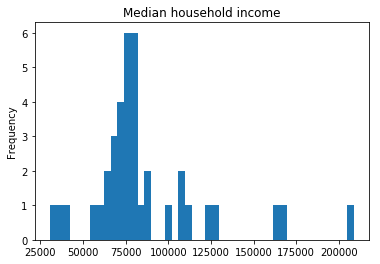

In [0]:
title = 'Median household income'

pc_his = df_exit_town_income['Median household income'].plot.hist(bins=45)

pc_his.set_title(title)

##Histogram for Exit

Text(0.5, 1.0, 'Exit')

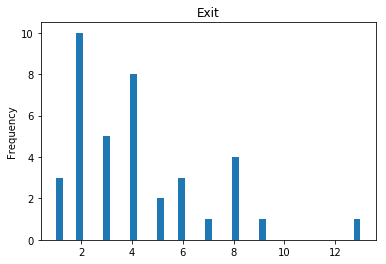

In [0]:
title = 'Exit'

pc_his = df_exit_town_income['Exit'].plot.hist(bins=45)

pc_his.set_title(title)

## Scatter plot for Exit and median per capita income

Text(0, 0.5, 'Median Income')

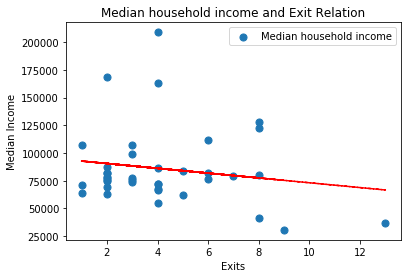

In [0]:
## Exit per cap scatter

data = df_exit_town_income[['Exit', 'Median household income']]
x = data['Exit']
y = data['Median household income']
title1 = 'Median household income and Exit Relation'
plt.scatter(x, y, label='Median household income', s=50)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.legend()
plt.title(title1)

plt.xlabel("Exits")
plt.ylabel("Median Income")

We see that there is a relation between Median house hold income and exits, When there are less exits in the town the median house hold income is higher but when the exits increase the median house hold income decreases.

##Question A5: Any relationship between population and income? Show the distributions of each variable (hist or density plot) and a scatterplot with a smoothed trendline.

In [0]:
#  All the datasets merged and stored in df_connecticut
df_connecticut = df_econ_pop_geo.merge(df_fe_adt,left_on = 'Towns', right_on = 'Town', how= 'left')
df_connecticut.rename(columns={'Est. Pop.':'Est_Population'},inplace= 'True')
df_connecticut['Est_Population']= df_connecticut['Est_Population'].str.replace(',', '')
df_connecticut[['Est_Population']]= df_connecticut[['Est_Population']].astype(int)
#df_connecticut.head()

169

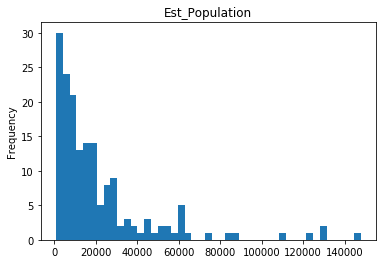

In [0]:
title = 'Est_Population'
pc__his_col = df_connecticut[['Towns',title, 'Median household income']]
pc__his_col = pc__his_col.drop_duplicates()
pc_his = pc__his_col['Est_Population'].plot.hist(bins=45)


pc_his.set_title(title)
pc__his_col['Towns'].count()



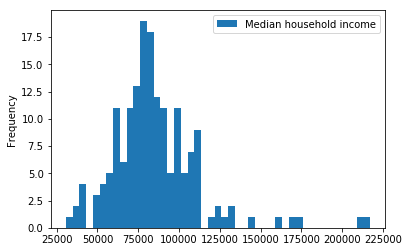

In [0]:
pc_his = pc__his_col[['Median household income']].plot.hist(bins=45)


The above plots take into account all the towns and their median household income

Text(0, 0.5, 'Median Income')

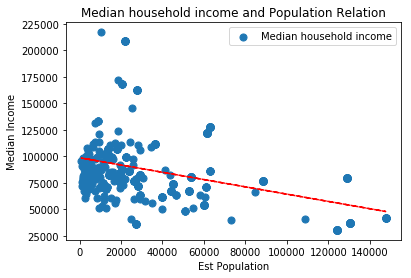

In [0]:
## Median Population and income scatter

data = df_connecticut[['Est_Population','Median household income']]
x = data['Est_Population']
y = data['Median household income']
title1 = 'Median household income and Population Relation'
plt.scatter(x, y, label='Median household income', s=50)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.legend()
plt.title(title1)



plt.xlabel("Est Population")
plt.ylabel("Median Income")


In [0]:
df_adt_len_per_exit.loc[df_adt_len_per_exit['Town_num']== 56]

,Town_num,Route,Begin Mile Pt,End Mile Pt,Functional Class,ADT,Year,length,RoadLen15,RoadLen91,RoadLen95,Town,Exit,NumExits15,NumExits91,NumExits95,RoadLenPerExits15,RoadLenPerExits91,RoadLenPerExits95
0,56,015,0.00,0.05,2.0,47400,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
1,56,015,0.05,0.15,2.0,44000,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
2,56,015,0.15,3.39,2.0,48400,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
3,56,015,3.39,3.44,2.0,47400,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
4,56,015,3.44,4.16,2.0,49900,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
5,56,015,4.16,4.50,2.0,49500,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
6,56,015,4.50,5.71,2.0,51600,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
7,56,015,5.71,5.83,2.0,52300,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
8,56,015,5.83,7.70,2.0,56400,2012,7.70,7.7,NaN,NaN,Greenwich,4.0,4.0,NaN,NaN,1.925,NaN,NaN
262,56,095,0.00,0.53,1.0,129700,2011,6.29,NaN,NaN,6.29,Greenwich,4.0,NaN,NaN,4.0,NaN,NaN,1.5725


In [0]:
pt_townCount_highway_exit_sum

,,Exit
Town,Town_num,
Branford,14,4.0
Bridgeport,15,8.0
Clinton,27,1.0
Cromwell,33,2.0
Darien,35,4.0
East Haven,43,2.0
East Lyme,44,5.0
East Windsor,46,2.0
Enfield,48,4.0


In [0]:

#df_exit_income_map = pv_town_exit.merge(df_econ_pop_geo,left_on='Town_name',right_on='Towns',how='right')
#df_exit_income_map.rename(columns={"Exit":"Number of exits"})

# See if you can use the final merged dataset: "df_connecticut"

##Question A6: For each road (XX = 15, 91, 95) and across all towns, make a four panel plot that shows density plots of: o	RoadLenXX,	NumExitsXX, RoadLenPerExits & MinTraffXX, MeanTraffXX, MaxTraffXX

In [0]:
df_highway_all = df_Max_Mean_Min_adt_length_exit_town.drop(columns = ['Begin Mile Pt','End Mile Pt','ADT'],axis=1)
df_highway_all= df_highway_all.drop_duplicates()
df_highway_all.loc[df_highway_all['Town_num']== 56]
df_highway_all.fillna(0, inplace=True)





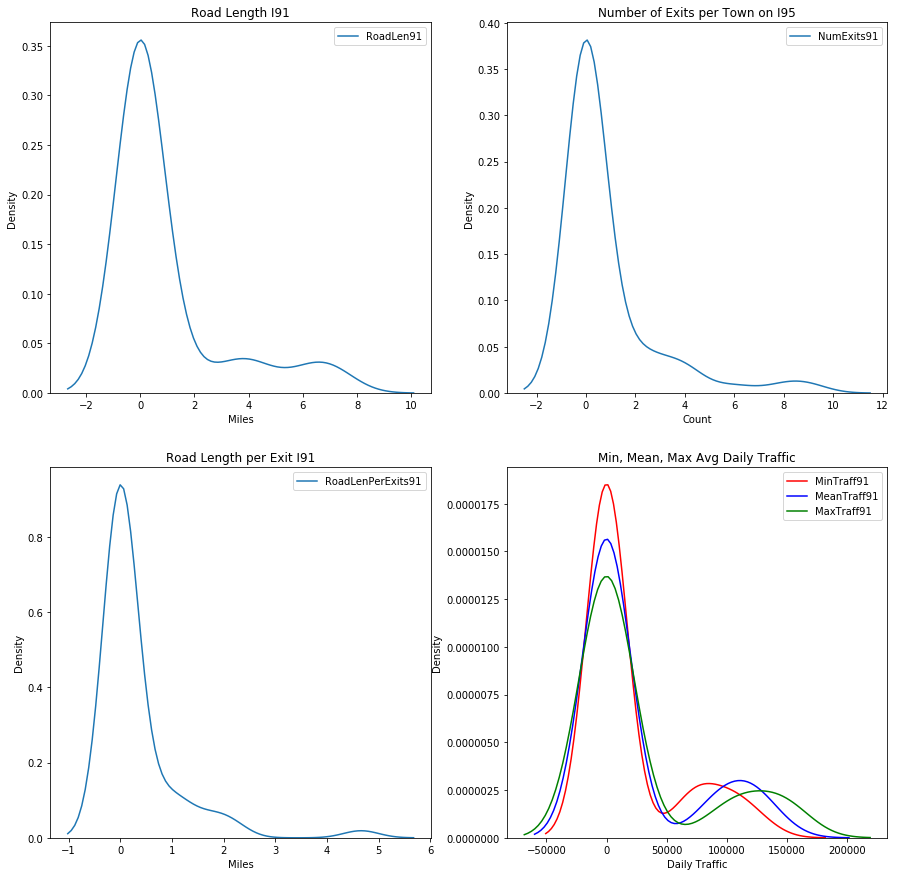

In [0]:
#91

fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
ax1 = sns.kdeplot(df_highway_all['RoadLen91'])

ax1.set_title('Road Length I91')
ax1.set_ylabel('Density')
ax1.set_xlabel('Miles')

plt.subplot(2,2,2)
ax2 = sns.kdeplot(df_highway_all['NumExits91'])
ax2.set_title('Number of Exits per Town on I95')
ax2.set_ylabel('Density')
ax2.set_xlabel('Count')

plt.subplot(2,2,3)
ax3 = sns.kdeplot(df_highway_all['RoadLenPerExits91'])
ax3.set_title('Road Length per Exit I91')
ax3.set_ylabel('Density')
ax3.set_xlabel('Miles')

plt.subplot(2,2,4)
ax4 = sns.kdeplot(df_highway_all['MinTraff91'], color='r') 
ax4 = sns.kdeplot(df_highway_all['MeanTraff91'], color='b')
ax4 = sns.kdeplot(df_highway_all['MaxTraff91'], color='g')
ax4.set_title('Min, Mean, Max Avg Daily Traffic')
ax4.set_ylabel('Density')
ax4.set_xlabel('Daily Traffic')
plt.show()


plt.show()


In [0]:
#I91 summary
df_route91_traff = temp_route_MaxTraff91.merge(temp_route_MeanTraff91,on='Town',how='outer').merge(temp_route_MinTraff91,on='Town',how='outer')
df_route91_traff = df_route91_traff.merge(temp_RoadLen91, on='Town',how='outer').merge(temp_NumExits91,on='Town',how='outer').merge(temp_RoadLenPerExits91,on='Town',how='outer')
df_route91_traff.describe()

,MaxTraff91,MeanTraff91,MinTraff91,RoadLen91,NumExits91,RoadLenPerExits91
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,125684.615385,110232.526886,91538.461538,4.461538,3.846154,1.481592
std,22506.474852,18564.906284,22265.875926,2.069983,2.444250,1.101458
min,85400.000000,79828.571429,56800.000000,1.190000,1.000000,0.446250
25%,110500.000000,94888.888889,76000.000000,3.390000,2.000000,0.860000
50%,115800.000000,112800.000000,91800.000000,4.110000,3.000000,1.130000
75%,147400.000000,119900.000000,106600.000000,6.510000,4.000000,1.760000
max,151000.000000,141920.000000,131500.000000,7.410000,9.000000,4.660000


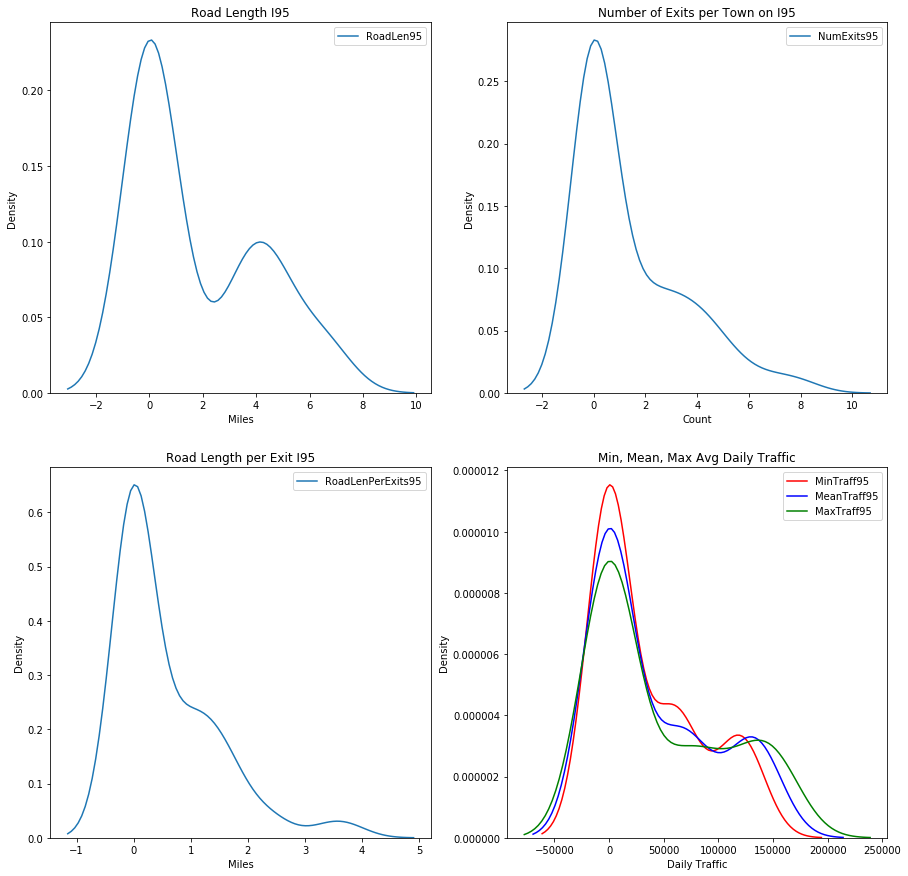

In [0]:
#95

fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
ax1 = sns.kdeplot(df_highway_all['RoadLen95'])
ax1.set_title('Road Length I95')
ax1.set_ylabel('Density')
ax1.set_xlabel('Miles')

plt.subplot(2,2,2)
ax2 = sns.kdeplot(df_highway_all['NumExits95'])
ax2.set_title('Number of Exits per Town on I95')
ax2.set_ylabel('Density')
ax2.set_xlabel('Count')

plt.subplot(2,2,3)
ax3 = sns.kdeplot(df_highway_all['RoadLenPerExits95'])
ax3.set_title('Road Length per Exit I95')
ax3.set_ylabel('Density')
ax3.set_xlabel('Miles')

plt.subplot(2,2,4)
ax4 = sns.kdeplot(df_highway_all['MinTraff95'], color='r') 
ax4 = sns.kdeplot(df_highway_all['MeanTraff95'], color='b')
ax4 = sns.kdeplot(df_highway_all['MaxTraff95'], color='g')
ax4.set_title('Min, Mean, Max Avg Daily Traffic')
ax4.set_ylabel('Density')
ax4.set_xlabel('Daily Traffic')
plt.show()

In [0]:
#I95 summary
df_route95_traff = temp_route_MaxTraff95.merge(temp_route_MeanTraff95,on='Town',how='outer').merge(temp_route_MinTraff15,on='Town',how='outer')
df_route95_traff = df_route95_traff.merge(temp_RoadLen95, on='Town',how='outer').merge(temp_NumExits95,on='Town',how='outer').merge(temp_RoadLenPerExits95,on='Town',how='outer')
df_route95_traff.describe()

,MaxTraff95,MeanTraff95,MinTraff15,RoadLen95,NumExits95,RoadLenPerExits95
count,26.000000,26.000000,21.000000,26.000000,24.000000,24.000000
mean,109238.461538,96644.830798,47219.047619,4.291154,3.541667,1.491931
std,37772.954101,35995.382041,12785.602021,1.524780,1.793204,0.810513
min,39200.000000,34740.000000,18700.000000,1.020000,1.000000,0.472500
25%,72050.000000,66253.125000,44000.000000,3.697500,2.000000,0.958125
50%,110000.000000,84060.000000,52200.000000,4.205000,3.000000,1.337333
75%,146500.000000,132506.428571,55300.000000,5.010000,4.250000,1.693750
max,161300.000000,144610.000000,62500.000000,6.840000,8.000000,3.750000


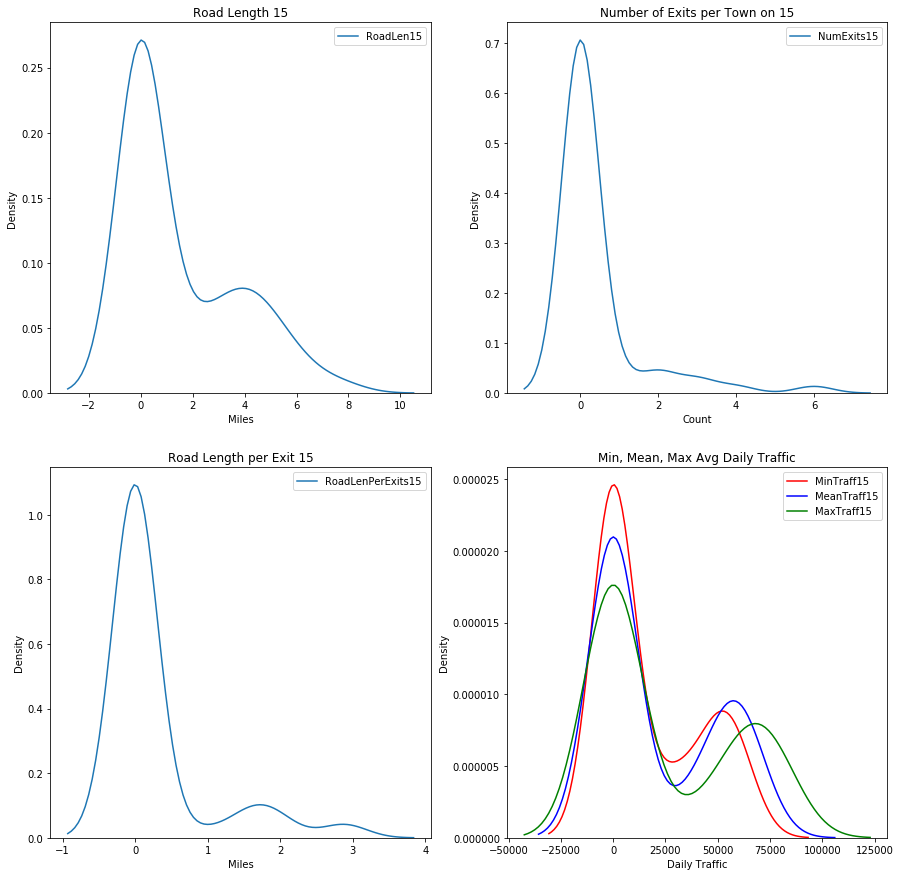

In [0]:
#Merrit Route 15

fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
ax1 = sns.kdeplot(df_highway_all['RoadLen15'])
ax1.set_title('Road Length 15')
ax1.set_ylabel('Density')
ax1.set_xlabel('Miles')

plt.subplot(2,2,2)
ax2 = sns.kdeplot(df_highway_all['NumExits15'])
ax2.set_title('Number of Exits per Town on 15')
ax2.set_ylabel('Density')
ax2.set_xlabel('Count')

plt.subplot(2,2,3)
ax3 = sns.kdeplot(df_highway_all['RoadLenPerExits15'])
ax3.set_title('Road Length per Exit 15')
ax3.set_ylabel('Density')
ax3.set_xlabel('Miles')

plt.subplot(2,2,4)
ax4 = sns.kdeplot(df_highway_all['MinTraff15'], color='r') 
ax4 = sns.kdeplot(df_highway_all['MeanTraff15'], color='b')
ax4 = sns.kdeplot(df_highway_all['MaxTraff15'], color='g')
ax4.set_title('Min, Mean, Max Avg Daily Traffic')
ax4.set_ylabel('Density')
ax4.set_xlabel('Daily Traffic')
plt.show()

In [0]:
#Route 15 summary
df_route15_traff = temp_route_MaxTraff15.merge(temp_route_MeanTraff15,on='Town',how='outer').merge(temp_route_MinTraff15,on='Town',how='outer')
df_route15_traff = df_route15_traff.merge(temp_RoadLen15, on='Town',how='outer').merge(temp_NumExits15,on='Town',how='outer').merge(temp_RoadLenPerExits15,on='Town',how='outer')
df_route15_traff.describe()


,MaxTraff15,MeanTraff15,MinTraff15,RoadLen15,NumExits15,RoadLenPerExits15
count,21.000000,21.000000,21.000000,21.000000,9.000000,9.000000
mean,65080.952381,55380.895863,47219.047619,3.977619,2.666667,1.892593
std,12772.925235,10692.730995,12785.602021,1.644487,1.581139,0.646862
min,31200.000000,27609.090909,18700.000000,1.620000,1.000000,0.898333
25%,60500.000000,50842.857143,44000.000000,2.910000,2.000000,1.526667
50%,67500.000000,57560.000000,52200.000000,3.850000,2.000000,1.755000
75%,76000.000000,61728.571429,55300.000000,4.680000,3.000000,2.020000
max,80400.000000,70300.000000,62500.000000,7.700000,6.000000,2.910000


##	Question A7: How would any of these variables relate to installing tolls on these roads in CT? What other datasets would be useful to you when deciding where to place tolls? Be creative.

The level of traffic would probably factor in greatly since toll booths for one slow down traffic and collect money.  Areas with higher volume will naturally generate more revenue; however, consequently it could create more traffic and slow the pace of travel.  The number of exits and on-ramps would also be a factor as well because you would have to build toll booths for every on-ramp, which can be costly.  Other data sets that could be useful would be traffic data for local roads nearby the major highways.  Since toll booths incur a monetary expense this will undoubtedly prompt a certain percent of the commuter population to seek alternative routes of travel, such as side roads. Knowing the level of traffic as well as number of traffic lights for these alternative routes could help in forecasting the maximum amount of money that can be collected from toll booths.


